In [ ]:
!pip install contractions
!pip install pyLDAvis
!pip install keybert
!pip install -U sentence-transformers
!pip install tweetnlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 5.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 11.5 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-p

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import re
import contractions
import string
import spacy
from nltk.corpus import stopwords
import pyLDAvis
import pyLDAvis.gensim_models
import math
from keybert import KeyBERT
import networkx as nx
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F
import matplotlib.pyplot as plt
import wordcloud
import matplotlib.colors as mcolors
import tweetnlp
from google.colab import drive
import os
import sys
import pandas as pd
import numpy as np
from itertools import product

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
names = spacy.load("en_core_web_sm")
propnames = tweetnlp.load_model('ner')

In [ ]:
makeSame = [["juventus", "juve"], ["barcelona", "barca"], ["manchester", "manchester city", "city"], ["potter", "graham", "graham potter"], ["boely", "todd", "todd boehly"], 
["bloom", "tony", "tony bloom"], ["trossard", "leandro trossard", "leandro"], ["mitoma", "kaoru", "kaoru mitoma"], ["guardiola", "pep", "pep guardiola"], ["webster", "adam webster"], ["gilmour", "billy", "billy gilmour"], ["ensico", "julio", "julio ensico"], 
["lallana", "adam lallana"], ["estupinan", "perwis", "perwis estupinan"], ["marsch", "solly", "solly marsch"], ["allister", "macallister", "mac allister", "alexis mac allister", "alexis macallister", "alexis"], ["gross", "pascal", "pascal gross"], 
["welbeck", "danny", "danny welbeck"], ["ferguson", "evan ferguson", "evan"], ["lamptey", "tariq", "tariq lamptey"], ["mwepu", "enock", "enock mwepu"], ["caicedo", "moises", "moises caicedo"], ["sarmiento", "jeremy", "jeremy sarmiento"],["tottenham", "spur", "spurs"]]
combined = [item for lis in makeSame for item in lis if item!= lis[0]]

In [ ]:
tweetsFile = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/BSProject/datasets/labelled/ldaMSS.csv")
tweets = tweetsFile.Preprocessed.values.tolist()
for i in range(len(tweets)):
    tweets[i] = tweets[i].replace("de zerbi", "")
    tweets[i] = tweets[i].replace("dezerbi", "")
    tweets[i] = tweets[i].replace("zerbi", "")
    tweets[i] = tweets[i].replace(" de ", "")
    tweets[i] = tweets[i].replace("roberto", "")
    tweets[i] = tweets[i].replace("robert", "")
    tweets[i] = tweets[i].replace("francesco", "")
    tweets[i] = tweets[i].replace("rdz", "")
    tweets[i] = tweets[i].replace("brighton", "")
    tweets[i] = tweets[i].replace("bha", "")

#Proper Nouns

In [ ]:
def makeNutriment(tweet):
    t = propnames.ner(tweet)
    propn_tweet = []
    for i in t:
        if i['type'] == 'person' or i['type'] == 'group':
            e = i['entity'].strip()
            en = e.lower()
            ent = " ".join(en.split())
            propn_tweet.append(ent)
    return propn_tweet
propn_allTweets = map(makeNutriment, tweets)
properN = []
for item in propn_allTweets:
    properN.append(item)
print(properN)

[['lam', 'lallana', 'welbeck', 'trossard', 'st', 'trossard', 'mitoma'], [], [], [], [], [], [], ['potter', 'chelsea'], [], ['liverpool'], ['liverpool', 'thiago', 'ajax', 'potter'], [], ['leandro', 'trossard'], [], [], ['liverpool'], [], ['sassuolo'], [], ['joel', 'veltman'], [], [], ['karen carney'], ['tottenham'], [], ['danny welbeck'], ['potter'], [], [], [], ['trent', 'konate', 'ramsay', 'henderson', 'elliott', 'jota'], [], [], [], [], ['liverpool'], ['pep', 'guardiola'], ['liverpool'], [], [], [], ['lukaku'], [], [], [], [], [], ['potter'], ['graham'], [], [], [], ['tottenham'], ['leandro trossard'], [], ['graham'], [], ['potter', 'pot'], ['danny', 'welbeck', 'welbeck'], [], [], ['steve cooper'], ['adam', 'lallana'], [], [], ['graham potter'], ['sh'], [], [], [], [], ['potter'], [], [], ['lallana', 'mitoma'], [], [], ['potter', 'chelsea', 'moyes', 'westham'], [], [], [], ['potter', 'brentford'], [], [], ['gab', 'juls', 'kylian', 'p', 'cann', 'dembele', 'magu', 'rooney'], ['danny', 

#Common Nouns

In [ ]:
nouns = []
for tweet in tweets:
  token_pos = []
  for token in names(tweet):
    if token.pos_ == 'NOUN':
      token_pos.append(token.text.lower())
  nouns.append(token_pos)

#**Nutriment** Setting

In [ ]:
def make_same(mlist):
    for j in range(len(mlist)):
        for i in range(len(mlist[j])):
            if mlist[j][i] in combined:
                for lis in makeSame:
                    if mlist[j][i] in lis:
                        mlist[j][i] = lis[0]
    return mlist

uniN = make_same(nouns)
uniP = make_same(properN)
print(len(uniN))
print(uniN)
print(len(uniP))
print(uniP)

1858
[['use', 'welbeck', 'trossard', 'trossard', 'lw', 'top'], ['ignore', 'impact', 'team', 'today', 'performance', 'potter', 'ball'], ['chelsea', 'potter', 'performance'], ['expert', 'perception', 'england', 'league', 'press', 'team', 'expose'], ['train', 'session', 'head', 'coach', 'pattern', 'man', 'offs', 'progression', 'line', 'pressure', 'lure', 'concept', 'superiority', 'credit'], ['manager', 'formation', 'player', 'building', 'tightens', 'pitch', 'control', 'game', 'thing', 'team', 'control', 'rhythm', 'game'], ['ball', 'possession', 'manchester', 'love', 'midfield', 'presence', 'ball', 'manchester', 'side'], ['race', 'season', 'adjustment', 'potter', 'show', 'press'], ['discredit', 'potter', 'disgrace', 'way', 'potter', 'drill', 'team', 'presence'], ['bypass', 'press', 'liverpool', 'bait', 'press', 'bypass', 'ball', 'centre', 'midfield', 'pivot', 'advance', 'midfielder'], ['liverpool', 'play', 'use', 'potter'], ['season', 'club', 'start', 'move', 'level'], ['trossard', 'host',

In [ ]:
for i in range(len(tweets)):
    for prop in uniP[i]:
        if prop not in uniN[i]:
            uniN[i].append(prop)

token_tweets = uniN
print(len(token_tweets))
print(token_tweets)

1858
[['use', 'welbeck', 'trossard', 'trossard', 'lw', 'top', 'lam', 'lallana', 'st', 'mitoma'], ['ignore', 'impact', 'team', 'today', 'performance', 'potter', 'ball'], ['chelsea', 'potter', 'performance'], ['expert', 'perception', 'england', 'league', 'press', 'team', 'expose'], ['train', 'session', 'head', 'coach', 'pattern', 'man', 'offs', 'progression', 'line', 'pressure', 'lure', 'concept', 'superiority', 'credit'], ['manager', 'formation', 'player', 'building', 'tightens', 'pitch', 'control', 'game', 'thing', 'team', 'control', 'rhythm', 'game'], ['ball', 'possession', 'manchester', 'love', 'midfield', 'presence', 'ball', 'manchester', 'side'], ['race', 'season', 'adjustment', 'potter', 'show', 'press', 'chelsea'], ['discredit', 'potter', 'disgrace', 'way', 'potter', 'drill', 'team', 'presence'], ['bypass', 'press', 'liverpool', 'bait', 'press', 'bypass', 'ball', 'centre', 'midfield', 'pivot', 'advance', 'midfielder'], ['liverpool', 'play', 'use', 'potter', 'thiago', 'ajax'], ['s

In [ ]:
def find_unique_words(desiredlist):
    uniqueNouns = []
    for tweet in desiredlist:
        for token in tweet:
            if token not in uniqueNouns:
                uniqueNouns.append(token)
    return uniqueNouns

In [ ]:
uniquePropN = find_unique_words(token_tweets)
for i in range(len(tweets)):
    tweets[i] = re.sub(" +", " ", tweets[i])
    tweets[i] = tweets[i].split(" ")
    for item in tweets[i]:
        if item in uniquePropN:
            if item not in token_tweets[i]:
                token_tweets[i].append(item)

print(len(token_tweets))
print(token_tweets)

['think', 'need', 'get', 'use', 'estupinan', 'lamptey', 'gross', 'lallana', 'welbeck', 'trossard', 'st', 'trossard', 'mitoma', 'lw', 'set', 'cbs', 'top']


TypeError: ignored

In [ ]:
def make_dictionary(desiredlist):
    for j in range(len(desiredlist)):
        for i in range(len(desiredlist[j])):
            if desiredlist[j][i] in combined:
                for lis in makeSame:
                    if desiredlist[j][i] in lis:
                        desiredlist[j][i] = lis[0]
    freq = {}
    for tweet in desiredlist:
        for item in tweet:
            if item in freq:
                freq[item] += 1
            else:
                freq[item] = 1
    return dict(sorted(freq.items(), key=lambda x:x[1]))

nouns_propN_Dict = make_dictionary(token_tweets)
print(len(nouns_propN_Dict))
print(nouns_propN_Dict)

1879
{'lw': 1, 'ignore': 1, 'perception': 1, 'expose': 1, 'offs': 1, 'lure': 1, 'tightens': 1, 'rhythm': 1, 'disgrace': 1, 'bettor': 1, 'tool': 1, 'examination': 1, 'dislike': 1, 'closure': 1, 'bollock': 1, 'flaw': 1, 'innovation': 1, 'sustainability': 1, 'knack': 1, 'pause': 1, 'input': 1, 'assurance': 1, 'southgate': 1, 'konate': 1, 'glimpse': 1, 'stem': 1, 'insist': 1, 'laud': 1, 'extent': 1, 'counterpressing': 1, 'hazard': 1, 'lukaku': 1, 'aspect': 1, 'bridge': 1, 'fullback': 1, 'concentration': 1, 'framework': 1, 'cheek': 1, 'hone': 1, 'abundance': 1, 'underperformance': 1, 'shade': 1, 'gem': 1, 'helm': 1, 'twist': 1, 'intrinsics': 1, 'element': 1, 'relegate': 1, 'cohesive': 1, 'candidate': 1, 'positioning': 1, 'pragmatism': 1, 'transformation': 1, 'batter': 1, 'swap': 1, 'shuffle': 1, 'matteo': 1, 'underdogs': 1, 'switch': 1, 'naught': 1, '5u': 1, 'contes': 1, 'gab': 1, 'turmoil': 1, 'cannavaro': 1, 'rooney': 1, 'arm': 1, 'bubble': 1, 'heal': 1, 'insult': 1, 'ceiling': 1, 'flyer'

In [ ]:
nouns_propN_c1 = []
for k,v in nouns_propN_Dict.items():
    if v == 1 or len(k) <= 2:
        nouns_propN_c1.append(k)

print(len(nouns_propN_c1))
print(nouns_propN_c1)

986
['lw', 'ignore', 'perception', 'expose', 'offs', 'lure', 'tightens', 'rhythm', 'disgrace', 'bettor', 'tool', 'examination', 'dislike', 'closure', 'bollock', 'flaw', 'innovation', 'sustainability', 'knack', 'pause', 'input', 'assurance', 'southgate', 'konate', 'glimpse', 'stem', 'insist', 'laud', 'extent', 'counterpressing', 'hazard', 'lukaku', 'aspect', 'bridge', 'fullback', 'concentration', 'framework', 'cheek', 'hone', 'abundance', 'underperformance', 'shade', 'gem', 'helm', 'twist', 'intrinsics', 'element', 'relegate', 'cohesive', 'candidate', 'positioning', 'pragmatism', 'transformation', 'batter', 'swap', 'shuffle', 'matteo', 'underdogs', 'switch', 'naught', '5u', 'contes', 'gab', 'turmoil', 'cannavaro', 'rooney', 'arm', 'bubble', 'heal', 'insult', 'ceiling', 'flyer', 'falmer', 'jon', 'know', 'oop', 'mids', 'strap', 'blocker', 'feature', 'vanity', 'eg', 'jury', 'coup', 'overwhelm', 'zone', 'rangers', 'website', 'crystal', 'identity', 'spotlight', 'presser', 'fbs', 'jdp', 'reec

In [ ]:
nouns_propN_e1 = []
for tweet in token_tweets:
    temp = [i for i in tweet if i not in nouns_propN_c1]
    nouns_propN_e1.append(temp)
print(len(nouns_propN_e1))
print(nouns_propN_e1)

1858
[['welbeck', 'trossard', 'trossard', 'top', 'lallana'], ['impact', 'team', 'today', 'performance', 'potter', 'ball', 'bright', 'tuchel'], ['potter', 'performance', 'bright'], ['expert', 'england', 'league', 'sassuolo', 'press', 'team'], ['train', 'session', 'sassuolo', 'head', 'coach', 'pattern', 'man', 'progression', 'line', 'pressure', 'concept', 'superiority', 'credit'], ['manager', 'formation', 'player', 'building', 'pitch', 'control', 'game', 'thing', 'team', 'control', 'game'], ['ball', 'possession', 'manchester', 'love', 'midfield', 'presence', 'ball', 'manchester', 'side'], ['race', 'season', 'adjustment', 'potter', 'show', 'press', 'chelsea'], ['discredit', 'potter', 'way', 'potter', 'drill', 'team', 'presence'], ['bypass', 'press', 'liverpool', 'bait', 'press', 'bypass', 'ball', 'centre', 'midfield', 'pivot', 'advance', 'midfielder', 'bright'], ['liverpool', 'play', 'potter', 'thiago', 'ajax'], ['season', 'club', 'start', 'move', 'level'], ['trossard', 'host', 'form', 'a

In [ ]:
prepared_tweets = []
for i in range(len(nouns_propN_e1)):
    if len(nouns_propN_e1[i]) != 0:
        prepared_tweets.append(nouns_propN_e1[i])
print(len(prepared_tweets))

1729


In [ ]:
prepared_tweets_Dict = make_dictionary(prepared_tweets)
words = []
freq = []
for k,v in prepared_tweets_Dict.items():
    words.append(k)
    freq.append(v)

df = pd.DataFrame({"words": words, "freq": freq})
df.to_csv("/content/drive/MyDrive/Colab Notebooks/BSProject/datasets/nutriments.csv", index=False) 

#LDA

In [ ]:
def create_dictionary(words):
    return corpora.Dictionary(words)
id2word=create_dictionary(prepared_tweets)
print(id2word)

Dictionary<893 unique tokens: ['lallana', 'top', 'trossard', 'welbeck', 'ball']...>


In [ ]:
def create_document_matrix(tokens, id2word):
  corpus = []
  for text in tokens:
    corpus.append(id2word.doc2bow(text))
  return corpus

corpus=create_document_matrix(prepared_tweets,id2word)

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                num_topics=num_topics,
                                                random_state=100,
                                                chunksize=200,
                                                alpha=1.5,
                                                passes=20,
                                                per_word_topics=True,
                                                id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=prepared_tweets,
                                                        limit=70,
                                                        start=10,
                                                        step=1)

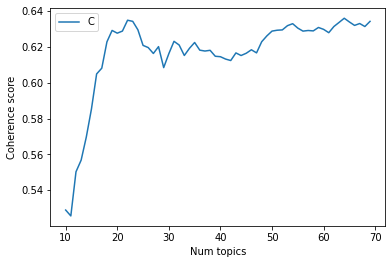

In [ ]:
limit = 70
start = 10
step = 1
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num topics")
plt.ylabel("Coherence score")
plt.legend(("Coherence_values"), loc="best")
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num topics = ", m, " has coherence value of ", round(cv, 4))

Num topics =  10  has coherence value of  0.529
Num topics =  11  has coherence value of  0.5257
Num topics =  12  has coherence value of  0.5503
Num topics =  13  has coherence value of  0.5568
Num topics =  14  has coherence value of  0.5697
Num topics =  15  has coherence value of  0.5854
Num topics =  16  has coherence value of  0.605
Num topics =  17  has coherence value of  0.6082
Num topics =  18  has coherence value of  0.6229
Num topics =  19  has coherence value of  0.6292
Num topics =  20  has coherence value of  0.6277
Num topics =  21  has coherence value of  0.6289
Num topics =  22  has coherence value of  0.6349
Num topics =  23  has coherence value of  0.6343
Num topics =  24  has coherence value of  0.6296
Num topics =  25  has coherence value of  0.6209
Num topics =  26  has coherence value of  0.6197
Num topics =  27  has coherence value of  0.6164
Num topics =  28  has coherence value of  0.6202
Num topics =  29  has coherence value of  0.6085
Num topics =  30  has 

In [ ]:
final_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              num_topics=54,
                                              random_state=100,
                                              chunksize=200,
                                              alpha=1.5,
                                              passes=20,
                                              per_word_topics=True,
                                              id2word=id2word)

In [ ]:
def get_lda_topics(model, num_topics, top_n_words):
    word_dict = {}
    for i in range(num_topics):
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in model.show_topic(i, topn = top_n_words)];
    pd.DataFrame(word_dict).to_csv("/content/drive/MyDrive/Colab Notebooks/BSProject/datasets/lda_1.csv", index=False) 
    return pd.DataFrame(word_dict)
get_lda_topics(final_model,54,15)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 45,Topic # 46,Topic # 47,Topic # 48,Topic # 49,Topic # 50,Topic # 51,Topic # 52,Topic # 53,Topic # 54
0,guardiola,team,press,liverpool,side,coach,today,tomorrow,team,pitch,...,win,head,pot,potter,potter,league,ball,watch,trossard,club
1,boss,record,appointment,bright,attack,support,match,trust,love,idea,...,tottenham,albion,conte,klopp,cook,chance,possession,quality,problem,job
2,table,position,opposition,value,performance,train,spot,line,passion,half,...,result,ball,potter,howe,defence,rodgers,praise,start,comment,injury
3,principle,thread,option,channel,defender,decision,force,system,mind,structure,...,need,surprise,transition,transfer,base,midfield,adam,interview,fixture,staff
4,england,lack,mistake,league,consistency,sort,section,midfielder,ball,creation,...,tuchel,stuff,summer,tweet,area,share,lallana,project,connection,presence
5,download,loan,rise,pundit,possibility,share,pundit,predecessor,lewis,groundwork,...,share,souness,game,kind,webster,imprint,block,sense,share,team
6,che,potter,lewis,dunk,section,imprint,gameplay,front,download,section,...,section,trait,possibility,league,ball,trait,sack,memory,souness,download
7,share,player,share,lewis,download,trait,imprint,potter,rise,imprint,...,download,dunk,download,pot,player,dunk,disappoint,hughton,trait,rise
8,souness,ball,section,possibility,rise,dunk,trait,lewis,provocation,trait,...,che,lewis,rise,download,download,lewis,section,possibility,dunk,section
9,section,rise,download,provocation,provocation,lewis,dunk,section,share,dunk,...,dunk,possibility,provocation,rise,section,possibility,download,lewis,lewis,trait


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(final_model, corpus, id2word, mds="mmds", R=15)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
35    -0.278998  0.358328       1        1  1.931423
33    -0.086043  0.489227       2        1  1.908595
4      0.267321 -0.363347       3        1  1.908486
21     0.388829 -0.244325       4        1  1.904469
26     0.476744 -0.127879       5        1  1.902191
53     0.317816  0.330079       6        1  1.901045
0      0.481130  0.123152       7        1  1.897966
49     0.405536  0.249155       8        1  1.894305
2     -0.432142  0.166429       9        1  1.890783
5     -0.454548 -0.024018      10        1  1.874299
3      0.184263 -0.407363      11        1  1.873582
11     0.007833  0.329124      12        1  1.867591
31    -0.006861  0.287682      13        1  1.866639
37     0.197318  0.436741      14        1  1.863144
1      0.203811 -0.049061      15        1  1.860750
23    -0.090662 -0.057901      16        1  1.856880
46     0.093307  0.200291      17        1  1.854533
16    -0.051064  0.315015      18        1  1.854156
19     0.246556 -0.021958      19        1  1.854070
47     0.017699  0.387985      20        1  1.853737
34     0.255386  0.267460      21        1  1.853228
27    -0.378966  0.260427      22        1  1.851877
32    -0.307480  0.056239      23        1  1.851761
10    -0.278530  0.299086      24        1  1.851178
52     0.327682  0.148058      25        1  1.849677
8      0.311557 -0.124399      26        1  1.847912
50    -0.332159 -0.192255      27        1  1.846328
48     0.046367  0.334833      28        1  1.846112
13     0.123074  0.296876      29        1  1.846007
43    -0.289755 -0.259225      30        1  1.845465
20    -0.022801  0.132667      31        1  1.845380
7      0.125254 -0.275510      32        1  1.844063
28    -0.205853 -0.380747      33        1  1.842391
44     0.311628 -0.288361      34        1  1.841674
17    -0.182791  0.325851      35        1  1.835556
14     0.092218 -0.463239      36        1  1.835315
29    -0.427023  0.067646      37        1  1.835164
12    -0.022560 -0.440520      38        1  1.834508
6      0.440185  0.011722      39        1  1.830391
18    -0.163655  0.084185      40        1  1.829471
41     0.031877 -0.061215      41        1  1.829434
15     0.040370 -0.339427      42        1  1.826824
40    -0.378803 -0.211790      43        1  1.826546
24     0.329942 -0.039342      44        1  1.826511
9     -0.036662 -0.204565      45        1  1.826409
25    -0.226156 -0.075935      46        1  1.826154
22    -0.270453  0.159066      47        1  1.825417
38    -0.116528 -0.421787      48        1  1.822730
30    -0.379616 -0.253681      49        1  1.821810
51     0.147475 -0.183897      50        1  1.820890
36     0.212454  0.060115      51        1  1.819295
45    -0.138831 -0.319407      52        1  1.815993
42    -0.206672 -0.225027      53        1  1.815546
39    -0.318017 -0.121257      54        1  1.814342, topic_info=        Term       Freq       Total Category  logprob  loglift
8     potter  439.00000  439.000000  Default  15.0000  15.0000
4       ball  399.00000  399.000000  Default  14.0000  14.0000
9       team  223.00000  223.000000  Default  13.0000  13.0000
32      game  159.00000  159.000000  Default  12.0000  12.0000
35    player  160.00000  160.000000  Default  11.0000  11.0000
..       ...        ...         ...      ...      ...      ...
0    lallana    0.02927   10.886793  Topic54  -8.6184  -1.9093
1        top    0.02927    5.822514  Topic54  -8.6184  -1.2835
2   trossard    0.02927   90.712989  Topic54  -8.6184  -4.0295
3    welbeck    0.02927   23.422801  Topic54  -8.6184  -2.6755
5     bright    0.02927   52.336581  Topic54  -8.6184  -3.4794

[1335 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
341      16  0.761134     action
222      27  0.849851       adam
350      35  0.780723  advantage
205      52  0.978024     albi

In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
import torch
model_name = 'google/pegasus-xsum'
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(torch_device)
src_text = [
    """this happened 5/6 years ago so my whole family every xmas day goes around to my aunties for celebrations. my cousin (of course) was there and he
asked if i wanted to play cops and robbers. i accepted of course. now, next to the side of my aunts house is a little area with a small fence, a covered
water tank and super duper sharp stones. my cousin (who was the cop) was gaining on me. i (tried) to jump over the fence, aaand i failed the jump
and went crashing onto the gravel, my leg hitting the sharpest bit and, then the next thing i knew it had a nasty gash."""
]
batch = tokenizer.prepare_seq2seq_batch(src_text, truncation=True, padding='longest').to(torch_device)
translated = model.generate(**batch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
print(tgt_text)